## Creating a baseline model using the cleaned data (before advanced feature engineering)

In [17]:
# Import the necessary packages
import os

# For calculating
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
X_train = pd.read_csv("../data/X_train.csv", dtype={'continent_dep': 'string', 'continent_arr': 'string'}, na_values=[''])
y_train = pd.read_csv("../data/y_train.csv")
X_test = pd.read_csv("../data/X_test.csv", dtype={'continent_dep': 'string', 'continent_arr': 'string'}, na_values=[''])
y_test = pd.read_csv("../data/y_test.csv")

In [19]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (74943, 159)
X_test shape: (18736, 159)


In [20]:
X_train.head(20)

,one_hot__airline_5K,one_hot__airline_5M,one_hot__airline_6P,one_hot__airline_BJ,one_hot__airline_D4,one_hot__airline_GJ,one_hot__airline_GW,one_hot__airline_OL,one_hot__airline_PS,one_hot__airline_QS,...,one_hot__iso_country_arr_TR,one_hot__iso_country_arr_UA,one_hot__type_dep_large_airport,one_hot__type_dep_medium_airport,one_hot__type_dep_small_airport,one_hot__type_arr_large_airport,one_hot__type_arr_medium_airport,one_hot__type_arr_small_airport,passthrough__is_same_country,passthrough__std_time_dec
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False,11.4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,18.2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False,13.8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,9.3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,10.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,False,10.7
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,True,7.6
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,False,5.1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,False,17.5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,False,21.2


In [21]:
print("Remaining Features in X_train:")
print(X_train.columns)

Remaining Features in X_train:
Index(['one_hot__airline_5K', 'one_hot__airline_5M', 'one_hot__airline_6P',
       'one_hot__airline_BJ', 'one_hot__airline_D4', 'one_hot__airline_GJ',
       'one_hot__airline_GW', 'one_hot__airline_OL', 'one_hot__airline_PS',
       'one_hot__airline_QS',
       ...
       'one_hot__iso_country_arr_TR', 'one_hot__iso_country_arr_UA',
       'one_hot__type_dep_large_airport', 'one_hot__type_dep_medium_airport',
       'one_hot__type_dep_small_airport', 'one_hot__type_arr_large_airport',
       'one_hot__type_arr_medium_airport', 'one_hot__type_arr_small_airport',
       'passthrough__is_same_country', 'passthrough__std_time_dec'],
      dtype='object', length=159)


In [22]:
# Initialize Linear Regression model
baseline_model = LinearRegression()

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print results
print(f"Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance on Test Set:
Mean Absolute Error (MAE): 59.36
Root Mean Squared Error (RMSE): 121.47


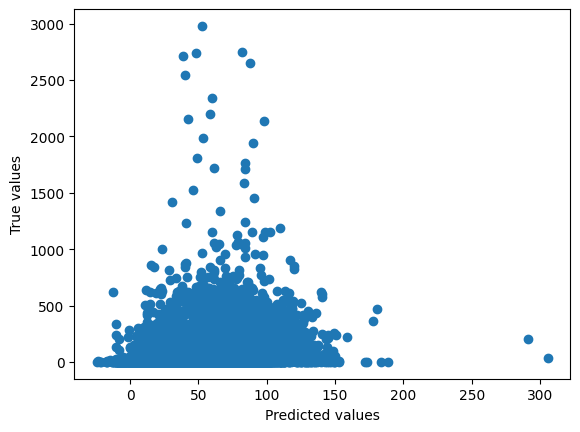

In [23]:
plt.scatter(y_pred, y_test) 
plt.ylabel("True values")
plt.xlabel("Predicted values")
plt.show()

ValueError: x and y must be the same size

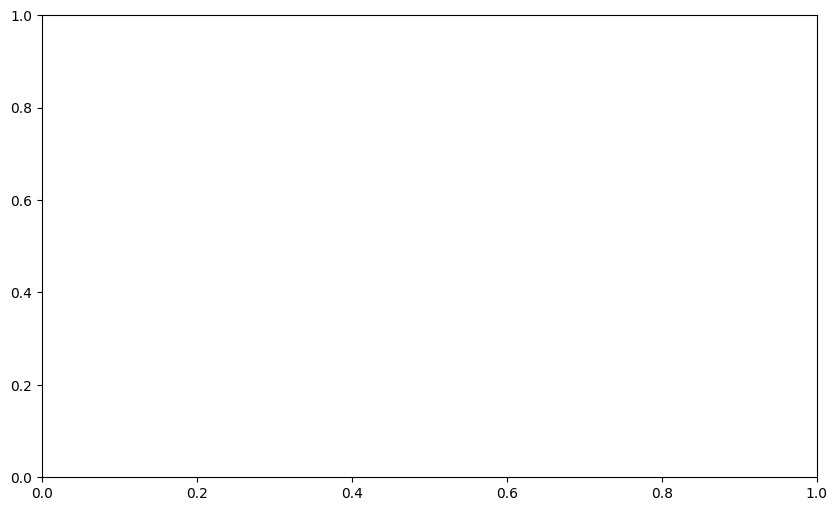

In [16]:
# Calculate residuals
residuals = y_test.values.flatten() - y_pred

# Standardize residuals
standardized_residuals = residuals / np.std(residuals)

# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, standardized_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Value')
plt.ylabel('Standardized Residual')
plt.title('Residual Plot')
plt.show()

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.8732e+04]),
 array([-2.32710671e+12, -2.09439604e+12, -1.86168537e+12, -1.62897470e+12,
        -1.39626403e+12, -1.16355336e+12, -9.30842685e+11, -6.98132014e+11,
        -4.65421343e+11, -2.32710671e+11,  6.56250000e+00]),
 <BarContainer object of 10 artists>)

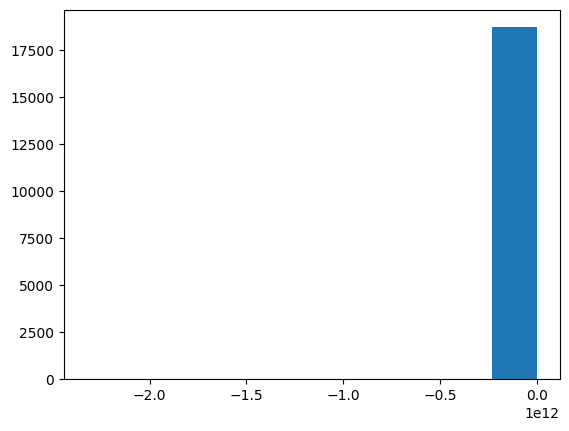

In [8]:
plt.hist(y_pred)

In [9]:
rows_with_all_false_or_zero = X_train[ (X_train == False)].all(axis=1) # Filter the rows 
result = X_train[rows_with_all_false_or_zero]
result 

,one_hot__airline_5K,one_hot__airline_5M,one_hot__airline_6P,one_hot__airline_BJ,one_hot__airline_D4,one_hot__airline_GJ,one_hot__airline_GW,one_hot__airline_OL,one_hot__airline_PS,one_hot__airline_QS,...,one_hot__iso_country_arr_SK,one_hot__iso_country_arr_SN,one_hot__iso_country_arr_TG,one_hot__iso_country_arr_TN,one_hot__iso_country_arr_TR,one_hot__iso_country_arr_UA,one_hot__type_arr_large_airport,one_hot__type_arr_medium_airport,one_hot__type_arr_small_airport,passthrough__is_same_country


In [10]:
coefficients = np.array(baseline_model.coef_) 
coefficients_transp  = coefficients.reshape(-1, 1)
coefficients_df = pd.DataFrame(coefficients_transp, index=np.array(X_train.columns), columns=['Coefficient'])
coefficients_df.sort_values( by= 'Coefficient', ascending = False)

,Coefficient
one_hot__type_dep_small_airport,2.655427e+12
one_hot__type_dep_large_airport,2.655427e+12
one_hot__type_dep_medium_airport,2.655427e+12
one_hot__iso_country_dep_GN,2.327107e+12
one_hot__iso_country_dep_SD,2.327107e+12
...,...
one_hot__continent_dep_AF,-5.956328e+11
one_hot__iso_country_arr_CA,-2.651744e+12
one_hot__continent_arr_AS,-3.144470e+12
one_hot__continent_arr_EU,-3.144470e+12


In [11]:
coefficients

array([[-1.75056988e+10, -1.75056988e+10, -1.75056988e+10,
        -1.75056988e+10, -1.75056988e+10, -1.75056988e+10,
        -1.75056988e+10, -1.75056988e+10, -1.75056988e+10,
        -1.75056988e+10, -1.75056988e+10, -1.75056988e+10,
        -1.75056988e+10, -1.75056988e+10,  3.82351935e+10,
         3.82351935e+10,  3.82351935e+10,  3.82351935e+10,
         3.82351935e+10,  3.82351935e+10,  3.82351935e+10,
        -2.97179899e+11, -2.97179899e+11, -2.97179899e+11,
        -2.97179899e+11, -2.97179899e+11, -5.85921343e+10,
        -5.85921343e+10, -5.85921343e+10, -5.85921343e+10,
        -5.85921343e+10, -5.95632753e+11,  1.44058098e+12,
         1.44058098e+12,  3.49892803e+11,  2.32710671e+12,
         2.90892980e+11,  2.90892980e+11,  2.32710671e+12,
         2.32710671e+12,  1.38158116e+12,  2.32710671e+12,
         2.90892980e+11,  2.32710671e+12,  2.90892980e+11,
         2.90892980e+11,  2.90892980e+11,  2.32710671e+12,
         2.90892980e+11,  2.32710671e+12,  2.90892980e+1